# sigWave Test 003 #
<p>Adding methods to the sigWave class</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
%matplotlib inline
fsz = (9,6)
fsz2 = (fsz[0],fsz[1]/2.0)

In [16]:
class sigWave:
    """ Class for 'waveform' (CT) signals """
    type = 'waveform'
    def __init__(self, sig, Fs=8000, t0=0):
        """
        sig: real or complex-valued waveform samples
        Fs: sampling rate (default 8000 samples/sec)
        t0: start time of waveform in seconds (default 0)
        """
        self._sig = np.asanyarray(sig)
        self._Fs = Fs
        self._t0 = t0
        self._shape = np.shape(self._sig)
        if len(self._shape) > 1:
            self._Nsamp = len(self._sig[0])
        else:
            self._Nsamp = len(self._sig)
        self._tlen = self._Nsamp/float(self._Fs)
        self._tend = self._t0 + (self._Nsamp-1)/float(self._Fs)

    # Properties
    def __len__(self):
        return self._Nsamp   # Returns length in samples
    def __str__(self):       # String representation of object
        return 'Fs={}, t0={}, tlen={}'.format(self._Fs,self._t0,self._tlen)
    __repr__ = __str__
    def get_shape(self):
        return self._shape   # Returns shape of signal array
    def get_Fs(self):
        return self._Fs      # Returns sampling rate
    def get_t0(self):
        return self._t0      # Returns start time
    def get_tlen(self):
        return self._tlen    # Returns length in seconds
    def get_avgpwr(self):    # Returns average power
        return np.mean(np.power(np.abs(self._sig),2.0))    
    def get_tend(self):
        return self._tend    # Returns end time
    def set_t0(self, t0):
        self._t0 = t0        # Set new start time
        self._tend = self._t0 + (self._Nsamp-1)/float(self._Fs)

    # methods
    def timeAxis(self):       # Generate time axis
        return self._t0 + np.arange(self._Nsamp)/float(self._Fs)
    def signal(self):         # Return the waveform
        return self._sig
    def copy(self):           # Make a copy of a sigWave object
        return copy.deepcopy(self)
    def normalized(self):     # Normalize the signal to -1,+1 range
        new_sig = 1.0/np.max(abs(self._sig))*self._sig
        return sigWave(new_sig, self._Fs, self._t0)
    def scale(self, factor):  # Make a scaled copy of a sigWave object
        return sigWave(factor*self._sig, self._Fs, self._t0)
    def pwrx(self, x):        # Raise the signal to power x
        return sigWave(np.power(self._sig, x), self._Fs, self._t0)
    def apwrx(self, x):       # Raise absolute value of signal to power x
        return sigWave(np.power(np.abs(self._sig), x), self._Fs, self._t0)
    
    # more methods
    def __add__(self, other):
        """Add two sigWave signals, sample by sample"""
        if other == 0:
            return self
        assert self._Fs == other._Fs
        new_t0 = min(self._t0, other._t0)
        new_Nsamp = 1 + int(round(self._Fs*(max(self._tend,other._tend)-new_t0)))
        new_tend = new_t0 + (new_Nsamp-1)/float(self._Fs)
        if self._t0 == new_t0:
            new_self = np.hstack((self._sig,np.zeros(new_Nsamp-self._Nsamp)))
            new_other = np.hstack((np.zeros(new_Nsamp-other._Nsamp),other._sig))
        else:
            new_self = np.hstack((np.zeros(new_Nsamp-self._Nsamp),self._sig))
            new_other = np.hstack((other._sig,np.zeros(new_Nsamp-other._Nsamp)))
        new_sig = new_self + new_other
        return sigWave(new_sig, self._Fs, new_t0)
    def __or__(self, other):
        """Concatenate two waveforms"""
        assert self._Fs == other._Fs
        new_sig = np.hstack((self._sig,other._sig))
        return sigWave(new_sig, self._Fs, self._t0)    

In [17]:
# parameters
Fs = 16000
f0 = 100
tlen = 0.1
t0 = -0.05
# time axis for generating sine wave
tt = np.arange(np.round(tlen*Fs))/float(Fs) + t0
# Instantiate waveform sig0 with sampling rate Fs and t0=-0.05
sig0 = sigWave(1.5*np.sin(2*np.pi*f0*tt), Fs, t0)

In [18]:
tt

array([-0.05     , -0.0499375, -0.049875 , ...,  0.0498125,  0.049875 ,
        0.0499375])

In [19]:
print(sig0)
print(sig0.type)

Fs=16000, t0=-0.05, tlen=0.1
waveform


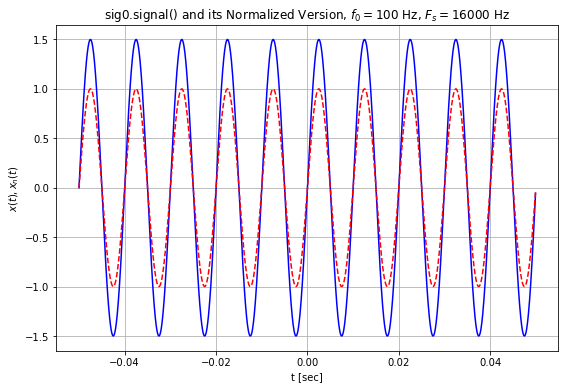

In [20]:
plt.figure(1, figsize=fsz)
plt.plot(sig0.timeAxis(), sig0.signal(), '-b')
plt.plot(sig0.timeAxis(), sig0.normalized().signal(), '--r')
plt.ylabel('$x(t), x_n(t)$')
plt.xlabel('t [sec]')
strt1 = 'sig0.signal() and its Normalized Version'
strt1 = strt1 + ', $f_0={}$ Hz, $F_s={}$ Hz'.format(f0, Fs)
plt.title(strt1)
plt.grid()
# plt.savefig('sigWave_test_003_fig1.eps')

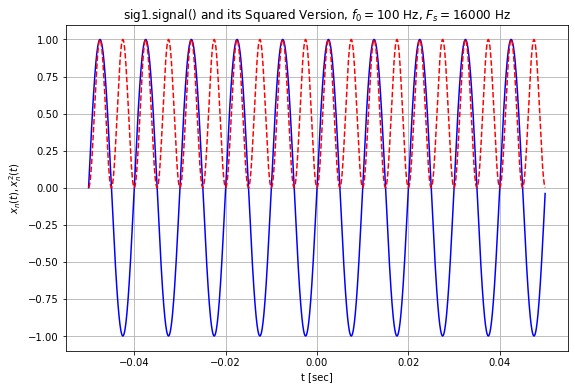

In [28]:
sig1 = sig0.normalized()
plt.figure(2, figsize=fsz)
plt.plot(sig1.timeAxis(), sig1.signal(), '-b')
plt.plot(sig1.timeAxis(), sig1.pwrx(2.0).signal(), '--r')
plt.ylabel('$x_n(t), x_n^2(t)$')
plt.xlabel('t [sec]')
strt2 = 'sig1.signal() and its Squared Version'
strt2 = strt2 + ', $f_0={}$ Hz, $F_s={}$ Hz'.format(f0, Fs)
plt.title(strt2)
plt.grid()
# plt.savefig('sigWave_test_003_fig2.eps')

In [29]:
f2 = 200
tlen2 = 0.1
t2 = 0
# time axis for generating sine wave
tt2 = np.arange(np.round(tlen*Fs))/float(Fs) + t2
# Instantiate waveform sig2 with sampling rate Fs and t2=0
sig2 = sigWave(0.8*np.sin(2*np.pi*f2*tt2), Fs, t2)

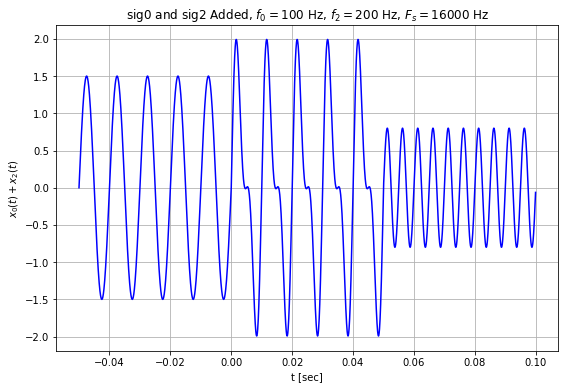

In [30]:
sig3 = sig0 + sig2
plt.figure(3, figsize=fsz)
plt.plot(sig3.timeAxis(), sig3.signal(), '-b')
plt.ylabel('$x_0(t) + x_2(t)$')
plt.xlabel('t [sec]')
strt3 = 'sig0 and sig2 Added'
strt3 = strt3 + ', $f_0={}$ Hz, $f_2={}$ Hz, $F_s={}$ Hz'.format(f0, f2, Fs)
plt.title(strt3)
plt.grid()
# plt.savefig('sigWave_test_003_fig3.eps')